In [1]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Training Data Shape: (1168, 81)
Test Data Shape: (292, 80)


In [2]:
missing_train = train_data.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_test = test_data.isnull().sum().sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
print("Missing Values in Training Data:\n", missing_train)
print("\nMissing Values in Test Data:\n", missing_test)
train_data.describe()
train_data.describe(include=['O'])

Missing Values in Training Data:
 PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
MasVnrType       703
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrArea         7
dtype: int64

Missing Values in Test Data:
 PoolQC          292
MiscFeature     282
Alley           278
Fence           248
MasVnrType      169
FireplaceQu     139
LotFrontage      45
GarageCond       17
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageFinish     17
BsmtFinType2      7
BsmtFinType1      7
BsmtExposure      7
BsmtCond          7
BsmtQual          7
Electrical        1
MasVnrArea        1
dtype: int64


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,77,1168,1168,1168,1168,1168,1168,1168,...,1104,1104,1104,1104,1168,7,237,44,1168,1168
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,928,1164,41,740,1046,1168,842,1105,182,1005,...,691,487,1050,1061,1071,3,129,40,999,945


In [3]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('train.csv')

# Display the first few rows
print(train_df.head())

# Display the summary of the dataset
print(train_df.info())

# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Summary statistics for numerical columns
print(train_df.describe())

# Summary statistics for categorical columns
print(train_df.describe(include=['O']))


    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal    

In [4]:
# Impute missing values for numerical columns with median
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Verify that there are no missing values left
print(train_df.isnull().sum().sum())  # Should return 0 if all missing values are handled


0


In [5]:
import numpy as np

# Using the IQR method to detect outliers
Q1 = train_df[numerical_cols].quantile(0.25)
Q3 = train_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on the IQR range
outliers = (train_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (train_df[numerical_cols] > (Q3 + 1.5 * IQR))
outliers = outliers.any(axis=1)

# Optionally, you can remove outliers or handle them differently
train_df = train_df[~outliers]

# Verify the dataset after handling outliers
print(train_df.shape)


(451, 81)


In [6]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Display the updated DataFrame
print(train_df.head())
print(train_df.info())  # Verify the number of columns after encoding


      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
2    793          60         92.0     9920            7            5   
5   1197          60         58.0    14054            7            5   
10   449          50         50.0     8600            6            6   
11   833          60         44.0     9548            7            6   
13    84          20         80.0     8892            5            5   

    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLD  \
2        1996          1997         0.0         862  ...           False   
5        2006          2006         0.0           0  ...           False   
10       1937          1950         0.0           0  ...           False   
11       2003          2003       223.0         483  ...           False   
13       1960          1960        66.0           0  ...           False   

    SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
2            False           Fa

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


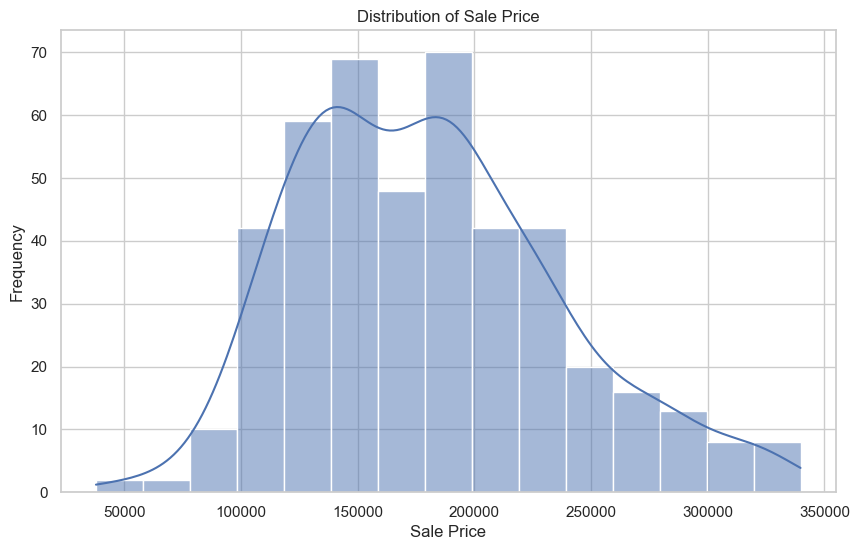

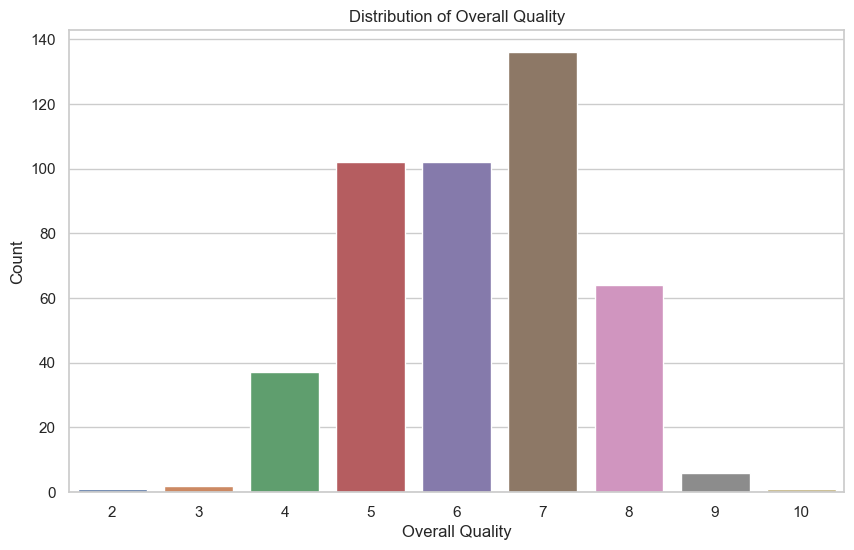

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Univariate analysis for numerical variables
# Example: Distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis for categorical variables
# Example: Count plot for a categorical variable (e.g., 'OverallQual')
plt.figure(figsize=(10, 6))
sns.countplot(x='OverallQual', data=train_df)
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()


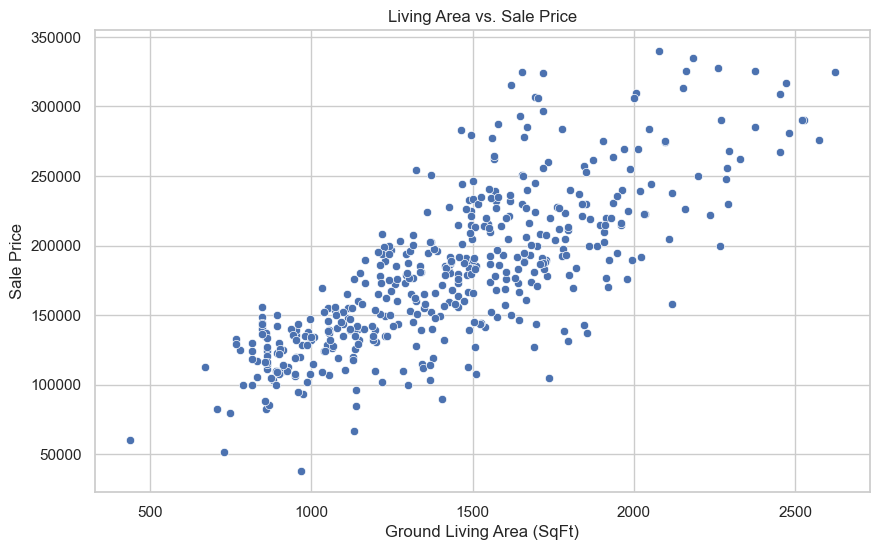

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


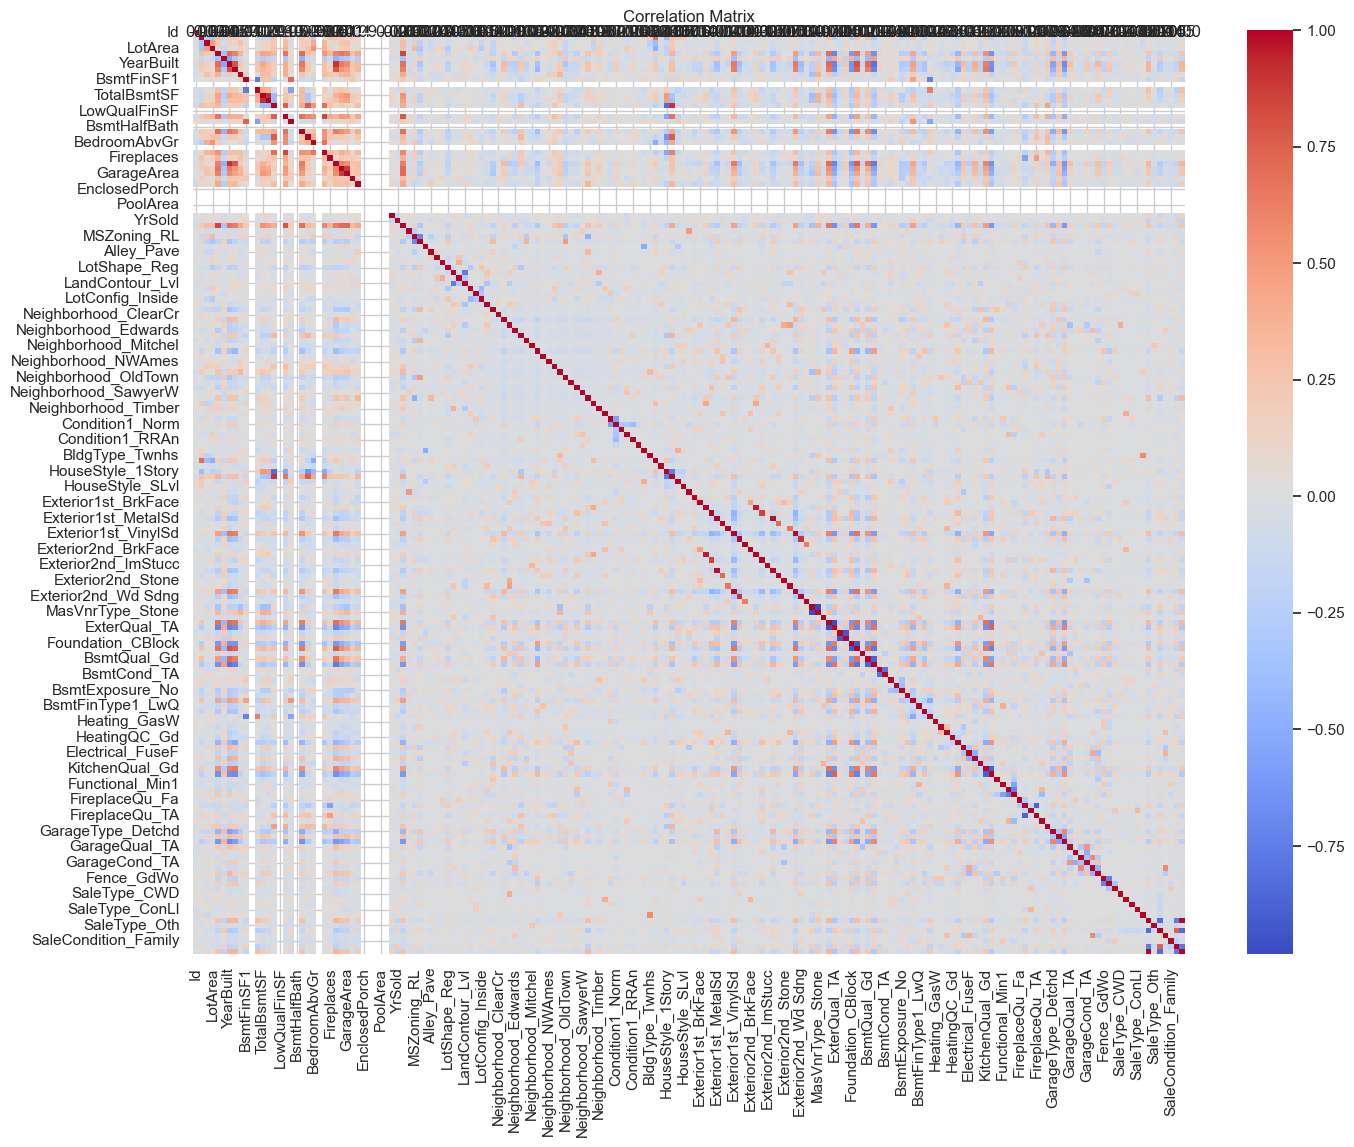

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

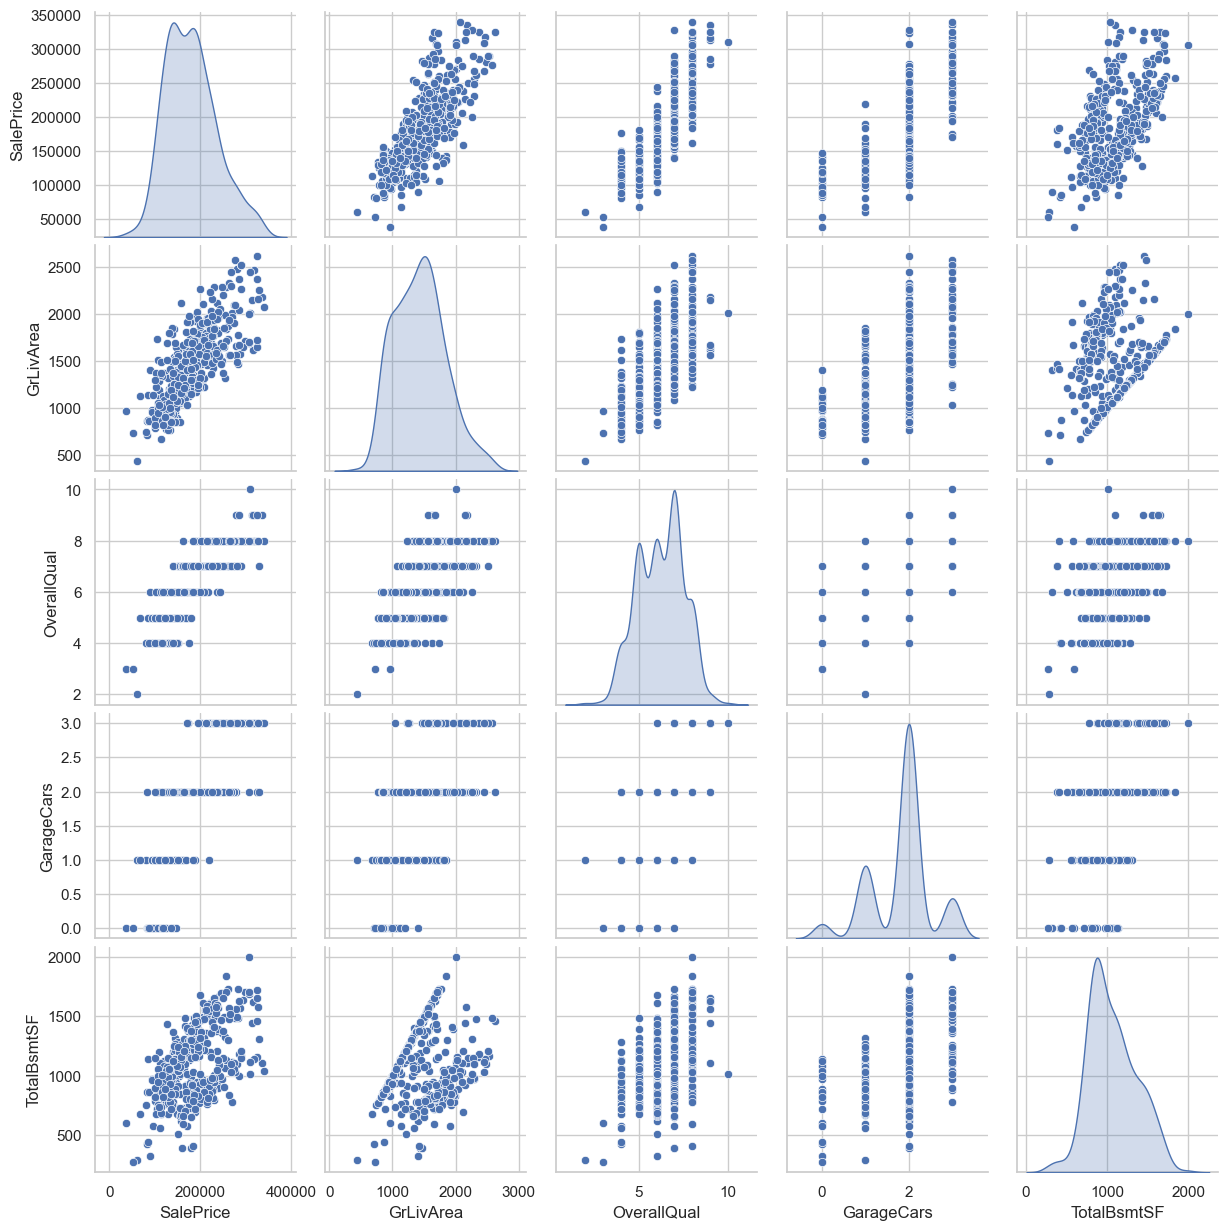

In [8]:
# Bivariate analysis: Scatter plot between 'GrLivArea' and 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Living Area vs. Sale Price')
plt.xlabel('Ground Living Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()

# Correlation matrix
corr_matrix = train_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features to explore relationships
selected_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train_df[selected_features], diag_kind='kde')
plt.show()


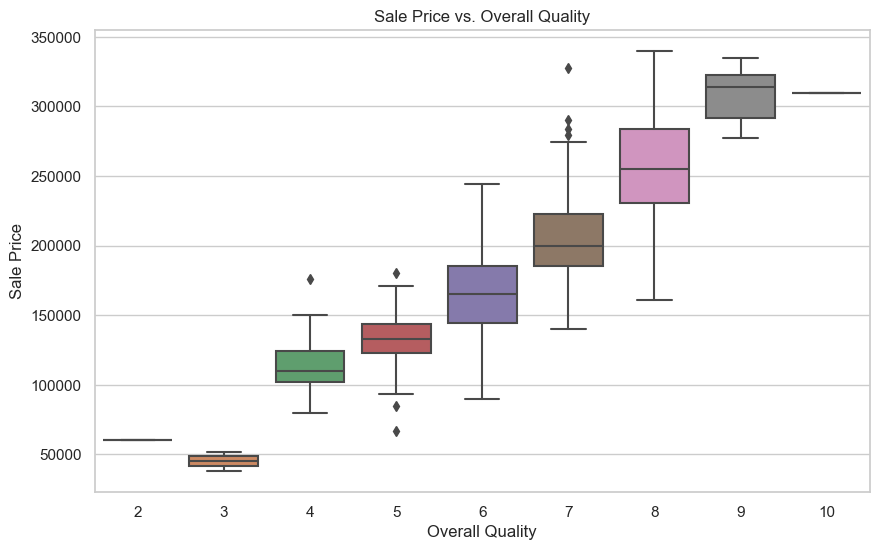

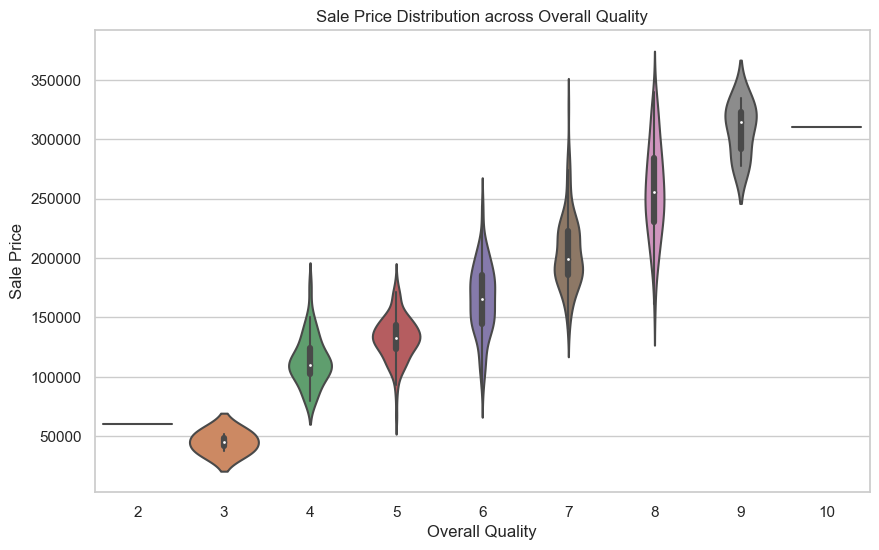

In [9]:
# Example: Boxplot to visualize the relationship between 'OverallQual' and 'SalePrice'
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Example: Violin plot to show the distribution of 'SalePrice' across different 'OverallQual'
plt.figure(figsize=(10, 6))
sns.violinplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price Distribution across Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


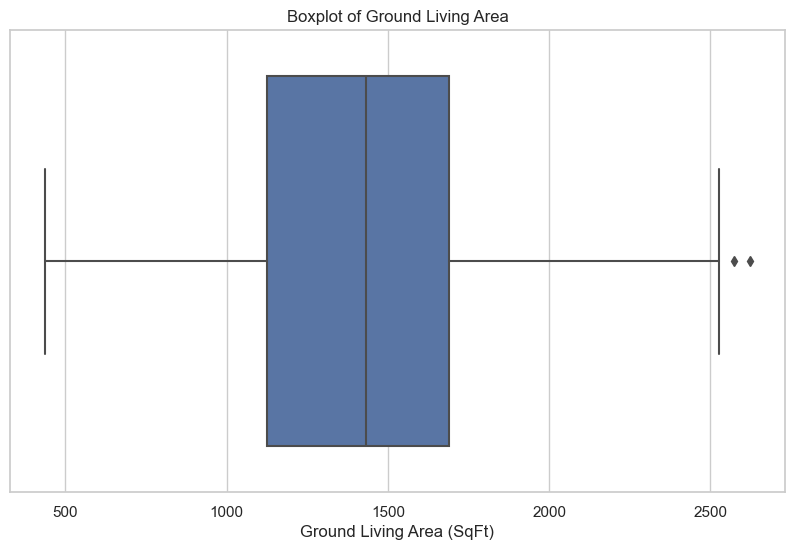

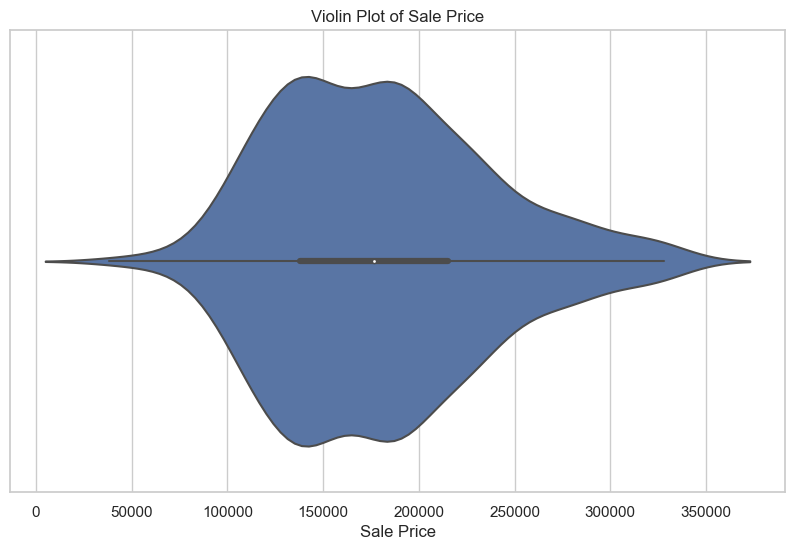

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


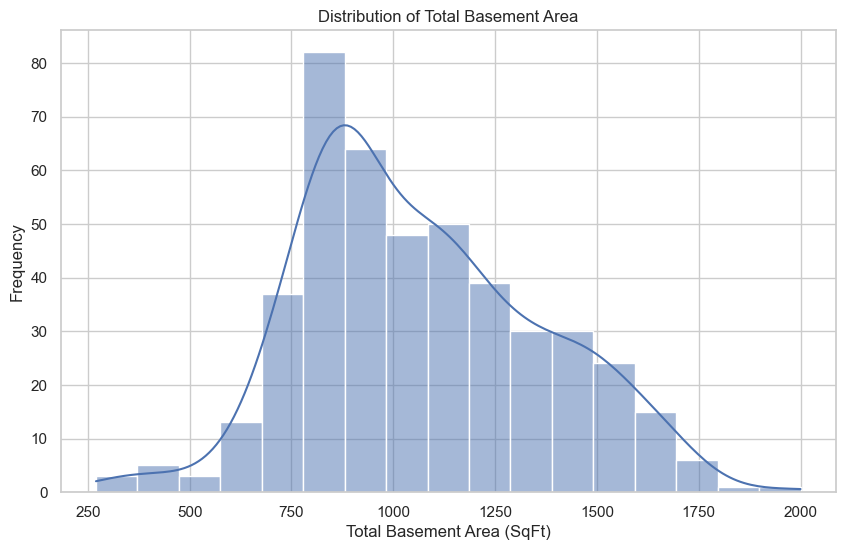

In [10]:
# Distribution of 'GrLivArea' with outlier detection using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['GrLivArea'])
plt.title('Boxplot of Ground Living Area')
plt.xlabel('Ground Living Area (SqFt)')
plt.show()

# Violin plot to check the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_df['SalePrice'])
plt.title('Violin Plot of Sale Price')
plt.xlabel('Sale Price')
plt.show()

# Histogram to understand the distribution of 'TotalBsmtSF'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['TotalBsmtSF'], kde=True)
plt.title('Distribution of Total Basement Area')
plt.xlabel('Total Basement Area (SqFt)')
plt.ylabel('Frequency')
plt.show()


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Creating new features based on domain knowledge and EDA insights

# Example: Total area of the house (adding Ground Living Area and Total Basement Area)
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']

# Example: Interaction term between Overall Quality and Total Area
train_df['QualAreaInteraction'] = train_df['OverallQual'] * train_df['TotalArea']

# Example: Creating a new feature that indicates whether the house has a large garage
train_df['LargeGarage'] = np.where(train_df['GarageArea'] > 500, 1, 0)

# Example: Ratio of above ground living area to total rooms
train_df['LivAreaPerRoom'] = train_df['GrLivArea'] / train_df['TotRmsAbvGrd']

# Example: Age of the house at the time of sale
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Display the first few rows to verify new features
print(train_df[['TotalArea', 'QualAreaInteraction', 'LargeGarage', 'LivAreaPerRoom', 'HouseAge']].head())


    TotalArea  QualAreaInteraction  LargeGarage  LivAreaPerRoom  HouseAge
2        3130                21910            0      251.625000        11
5        2742                19194            1      207.000000         0
10       2156                12936            0      196.571429        69
11       2770                19390            1      261.285714         7
13       2130                10650            0      177.500000        47


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example: Standard scaling of numerical features
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['GrLivArea', 'TotalBsmtSF', 'TotalArea', 'QualAreaInteraction', 'HouseAge']

# Apply scaling
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Display the first few rows to verify scaling
print(train_df[numerical_features].head())

# Example: Min-Max scaling (Normalization) of numerical features
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling
train_df[numerical_features] = min_max_scaler.fit_transform(train_df[numerical_features])

# Display the first few rows to verify Min-Max scaling
print(train_df[numerical_features].head())

# Example: Generating polynomial features (2nd degree)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply polynomial transformation to a subset of features
poly_features = poly.fit_transform(train_df[['GrLivArea', 'TotalBsmtSF']])

# Convert polynomial features to DataFrame and add to the original DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'TotalBsmtSF']))

# Concatenate the polynomial features with the original DataFrame
train_df = pd.concat([train_df, poly_features_df], axis=1)

# Display the first few rows to verify polynomial features
print(train_df.head())


    GrLivArea  TotalBsmtSF  TotalArea  QualAreaInteraction  HouseAge
2    1.437250     0.165903   1.135801             0.943507 -0.549059
5    1.064338    -0.643759   0.432818             0.503200 -0.981283
10  -0.146381    -0.980552  -0.628903            -0.511322  1.729944
11   0.979812    -0.432839   0.483549             0.534975 -0.706231
13  -0.919551    -0.010998  -0.676011            -0.881919  0.865495
    GrLivArea  TotalBsmtSF  TotalArea  QualAreaInteraction  HouseAge
2    0.721154     0.489595   0.715520             0.655073      0.11
5    0.652473     0.352023   0.599940             0.568089      0.00
10   0.429487     0.294798   0.425380             0.367666      0.69
11   0.636905     0.387861   0.608281             0.574366      0.07
13   0.287088     0.459538   0.417635             0.294453      0.47
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
2    793.0        60.0         92.0   9920.0          7.0          5.0   
5   1197.0        60.0  

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Now you can split the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [ ]:
# Option 2a: Drop rows with any NaN values
X_cleaned = X.dropna()

# Option 2b: Drop columns with any NaN values
X_cleaned = X.dropna(axis=1)

# Update target variable accordingly
y_cleaned = y[X_cleaned.index]

# Now you can split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Add HistGradientBoostingRegressor to your models
models['Hist Gradient Boosting'] = HistGradientBoostingRegressor(random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.2f}')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and validation sets
X = train_df.drop(columns=['SalePrice'])  # Features
y = train_df['SalePrice']                # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_net = ElasticNet()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}, R2: {r2_score(y_test, y_pred_lr)}")




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example transformation (scaling)
    ('model', LinearRegression())  # Model fitting step
])

pipeline.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R2 scores: {scores}')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

# Split the data into training and testing sets
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr)}, R2: {r2_score(y_test, y_pred_lr)}")

# Ridge Regression (L2 regularization)
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_}, MSE: {mean_squared_error(y_test, y_pred_ridge)}, R2: {r2_score(y_test, y_pred_ridge)}")

# Lasso Regression (L1 regularization)
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
y_pred_lasso = lasso_grid.best_estimator_.predict(X_test)
print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_}, MSE: {mean_squared_error(y_test, y_pred_lasso)}, R2: {r2_score(y_test, y_pred_lasso)}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Assuming 'train_df' is your DataFrame and 'SalePrice' is the target variable
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define models and their parameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}

# Perform Grid Search
for name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit_transform(X_train, y_train)
    print(f'{name} - Best Parameters: {grid_search.best_params_}, Best Score: {-grid_search.best_score_:.2f}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Load the dataset
train_df = pd.read_csv('train.csv')

# Features and target variable
X = train_df.drop('SalePrice', axis=1)  # Features
y = train_df['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, apply any preprocessing steps such as scaling
# Example: Standardizing numerical features if needed (use StandardScaler)


In [ ]:
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for a numerical variable, e.g., 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Histogram for another numerical variable, e.g., 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['GrLivArea'], kde=True, bins=30)
plt.title('Distribution of Ground Living Area')
plt.xlabel('Ground Living Area (SqFt)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Box plot for 'SalePrice' across different 'OverallQual' categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

# Box plot for 'GrLivArea'
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['GrLivArea'])
plt.title('Boxplot of Ground Living Area')
plt.xlabel('Ground Living Area (SqFt)')
plt.show()


In [ ]:
# Scatter plot between 'GrLivArea' and 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Ground Living Area vs. Sale Price')
plt.xlabel('Ground Living Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()

# Scatter plot between 'TotalBsmtSF' and 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df)
plt.title('Total Basement Area vs. Sale Price')
plt.xlabel('Total Basement Area (SqFt)')
plt.ylabel('Sale Price')
plt.show()


In [ ]:
# Bar plot for a categorical variable, e.g., 'OverallQual'
plt.figure(figsize=(10, 6))
sns.barplot(x=train_df['OverallQual'].value_counts().index, y=train_df['OverallQual'].value_counts().values)
plt.title('Count of Each Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()


In [ ]:
# Count plot for 'Neighborhood'
plt.figure(figsize=(12, 8))
sns.countplot(x='Neighborhood', data=train_df, order=train_df['Neighborhood'].value_counts().index)
plt.title('Count of Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Display the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Example: Heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis', linewidths=0.5)
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
Feature Engineering



**Steps:**

- Create new features based on domain knowledge and insights from EDA.

- Transform features as needed (e.g., log transformations for skewed data).

In [ ]:
# Interaction between 'OverallQual' and 'GrLivArea'
train_df['QualAreaInteraction'] = train_df['OverallQual'] * train_df['GrLivArea']


In [ ]:
# Total area of the house including basement
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']


In [ ]:
# Indicator for whether the house has a large garage
train_df['LargeGarage'] = (train_df['GarageArea'] > 500).astype(int)


In [ ]:
# Ratio of living area to total rooms
train_df['LivAreaPerRoom'] = train_df['GrLivArea'] / train_df['TotRmsAbvGrd']


In [ ]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']


In [ ]:
# Binning 'SalePrice' into categories
train_df['PriceBin'] = pd.cut(train_df['SalePrice'], bins=[0, 100000, 200000, 300000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
# Apply log transformation to 'SalePrice' and 'GrLivArea'
train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])
train_df['LogGrLivArea'] = np.log1p(train_df['GrLivArea'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical features to scale
numerical_features = ['GrLivArea', 'TotalBsmtSF', 'TotalArea', 'QualAreaInteraction', 'HouseAge']

# Apply scaling
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling
train_df[numerical_features] = min_max_scaler.fit_transform(train_df[numerical_features])


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply polynomial transformation to selected features
poly_features = poly.fit_transform(train_df[['GrLivArea', 'TotalBsmtSF']])

# Convert polynomial features to DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'TotalBsmtSF']))

# Concatenate polynomial features with the original DataFrame
train_df = pd.concat([train_df, poly_features_df], axis=1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit (X_train, y_train)

# Make predictions
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin_reg)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lin_reg)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lin_reg))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lin_reg)}")


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a model instance
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read the CSV files into DataFrames
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Combine train and test data for preprocessing
all_data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Handle Missing Values

# Numerical Columns: Impute with median
numerical_cols = all_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    all_data[col] = all_data[col].fillna(all_data[col].median())

# Categorical Columns: Impute with 'Missing'
categorical_cols = all_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    all_data[col] = all_data[col].fillna('Missing')

# Feature Engineering (If applicable)
# Create new features or transform existing features here (if necessary)

# Encoding Categorical Variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_categorical = encoder.fit_transform(all_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine numerical and encoded features
all_data_encoded = pd.concat([all_data[numerical_cols], encoded_df], axis=1)

# Split back into train and test
train_df_processed = all_data_encoded.loc[:train_df.index.max()].copy()
test_df_processed = all_data_encoded.loc[train_df.index.max() + 1:].copy()

# Separate target variable and features
y_train = train_df_processed['SalePrice']
X_train = train_df_processed.drop(['SalePrice', 'Id'], axis=1)
X_test = test_df_processed.drop('Id', axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Distribution of Target Variable (SalePrice)
sns.histplot(y_train, kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Distributions of Numerical Features
for col in numerical_cols:
    if col != 'SalePrice':  # Exclude the target variable
        sns.histplot(train_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Bar plots for Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis

# Correlation Heatmap (Numerical Features)
corr_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Scatter plots for top correlated features with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
for col in top_corr_features:
    if col != 'SalePrice':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=train_df[col], y=train_df['SalePrice'])
        plt.title(f'SalePrice vs {col}')
        plt.show()

# Box plots for Categorical Features vs SalePrice
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=train_df[col], y=train_df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge and Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Grid search for Ridge
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Print the best parameters and the corresponding score for Ridge
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best score for Ridge:", -grid_search_ridge.best_score_)

# Grid search for Lasso
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Print the best parameters and the corresponding score for Lasso
print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best score for Lasso:", -grid_search_lasso.best_score_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Distribution of Target Variable (SalePrice)
sns.histplot(y_train, kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Distributions of Numerical Features
for col in numerical_cols:
    if col != 'SalePrice':  # Exclude the target variable
        sns.histplot(train_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Distribution of Target Variable (SalePrice)
sns.histplot(y_train, kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Distributions of Numerical Features
for col in numerical_cols:
    if col != 'SalePrice':  # Exclude the target variable
        sns.histplot(train_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()


# Bar plots for Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bivariate Analysis

# Correlation Heatmap (Numerical Features)
corr_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Scatter plots for top correlated features with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
for col in top_corr_features:
    if col != 'SalePrice':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=train_df[col], y=train_df['SalePrice'])
        plt.title(f'SalePrice vs {col}')
        plt.show()

# Box plots for Categorical Features vs SalePrice
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=train_df[col], y=train_df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Distribution of Target Variable (SalePrice)
sns.histplot(y_train, kde=True)
plt.title('Distribution of Sale Price')
plt.show()

In [ ]:
for col in numerical_cols:
    if col != 'SalePrice':  # Exclude the target variable
        sns.histplot(train_df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train = pd.read_csv('train.csv')  # Replace with your file path if different
test = pd.read_csv('test.csv')

# Data Understanding
# Display first few rows of the training data
print("First 5 rows of the train dataset:")
print(train.head())

# Check the structure of the dataset
print("\nTrain Dataset Info:")
train.info()

# Check for missing values in the train dataset
missing_values_train = train.isnull().sum().sort_values(ascending=False)
print("\nMissing Values in Train Dataset:")
print(missing_values_train[missing_values_train > 0])

# Check for missing values in the test dataset
missing_values_test = test.isnull().sum().sort_values(ascending=False)
print("\nMissing Values in Test Dataset:")
print(missing_values_test[missing_values_test > 0])

# Data Cleaning: Handling Missing Values
# Visualizing missing values with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Data")
plt.show()

# Fill missing numerical values with median
for col in train.select_dtypes(include=[np.number]).columns:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in train.select_dtypes(include=[object]).columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

# Verify if missing values are filled
print("\nMissing Values in Train Dataset After Cleaning:")
print(train.isnull().sum().sum())

print("\nMissing Values in Test Dataset After Cleaning:")
print(test.isnull().sum().sum())

# Descriptive statistics
print("\nDescriptive statistics for the numerical columns:")
print(train.describe())

# Checking for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in train.select_dtypes(include=[object]).columns:
    print(f"{col}: {train[col].nunique()} unique values")

# Save the cleaned data if needed
train.to_csv('/mnt/data/train_cleaned.csv', index=False)
test.to_csv('/mnt/data/test_cleaned.csv', index=False)


In [34]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.head())
print(train_df.info())
print(train_df.describe())

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal    

In [35]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      214
Alley           1091
MasVnrType       703
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64


In [36]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['Alley'] = train_df['Alley'].fillna('None')
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
print(train_df.isnull().sum().sum())

4246


In [37]:
train_df = pd.get_dummies(train_df, columns=['MSZoning', 'Neighborhood', 'HouseStyle'], drop_first=True)
print(train_df.head())

    Id  MSSubClass  LotFrontage  LotArea Street Alley LotShape LandContour  \
0  127         120         70.0     4928   Pave  None      IR1         Lvl   
1  889          20         95.0    15865   Pave  None      IR1         Lvl   
2  793          60         92.0     9920   Pave  None      IR1         Lvl   
3  110          20        105.0    11751   Pave  None      IR1         Lvl   
4  422          20         70.0    16635   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... Neighborhood_StoneBr Neighborhood_Timber  \
0    AllPub    Inside  ...                False               False   
1    AllPub    Inside  ...                False               False   
2    AllPub   CulDSac  ...                False               False   
3    AllPub    Inside  ...                False               False   
4    AllPub       FR2  ...                False               False   

  Neighborhood_Veenker HouseStyle_1.5Unf  HouseStyle_1Story  \
0                False             False 

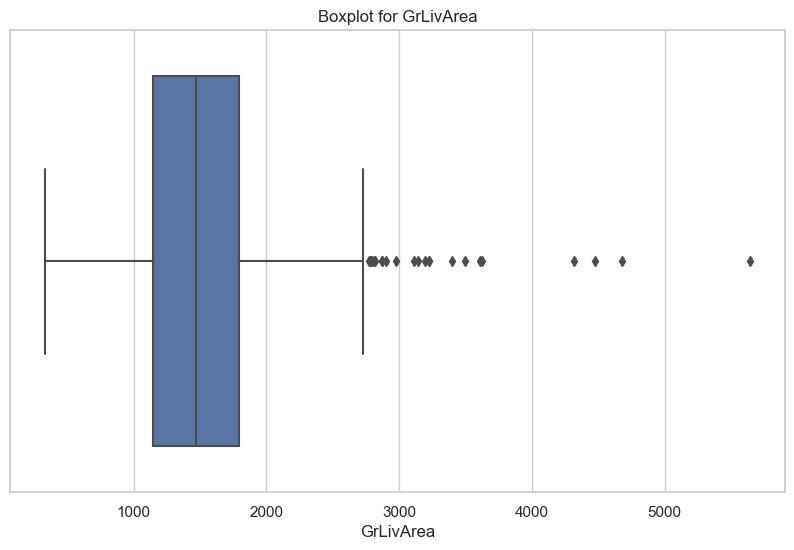

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['GrLivArea'])
plt.title('Boxplot for GrLivArea')
plt.show()
train_df = train_df[train_df['GrLivArea'] < 4000] 

In [39]:
# Example: Creating a new feature "HouseAge" from YearBuilt and YrSold
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Another example: Create a feature for total bathrooms
train_df['TotalBath'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) + 
                         train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))

# Inspect the new feature
print(train_df[['HouseAge', 'TotalBath']].head())


   HouseAge  TotalBath
0        31        2.0
1        37        3.0
2        11        3.5
3        33        2.0
4        32        2.5


In [40]:
print(train_df.info())
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 1167
Columns: 115 entries, Id to TotalBath
dtypes: bool(35), float64(4), int64(36), object(40)
memory usage: 776.4+ KB
None
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1164.000000  1164.000000  1164.000000    1164.000000  1164.000000   
mean    723.447595    56.756873    70.443299   10399.525773     6.091065   
std     416.273595    42.012284    21.069660    8784.692915     1.373608   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     358.500000    20.000000    60.000000    7594.500000     5.000000   
50%     714.500000    50.000000    70.000000    9502.500000     6.000000   
75%    1078.250000    70.000000    79.000000   11500.000000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond   YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1164.000000  1164.00000   1164.000000  11

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


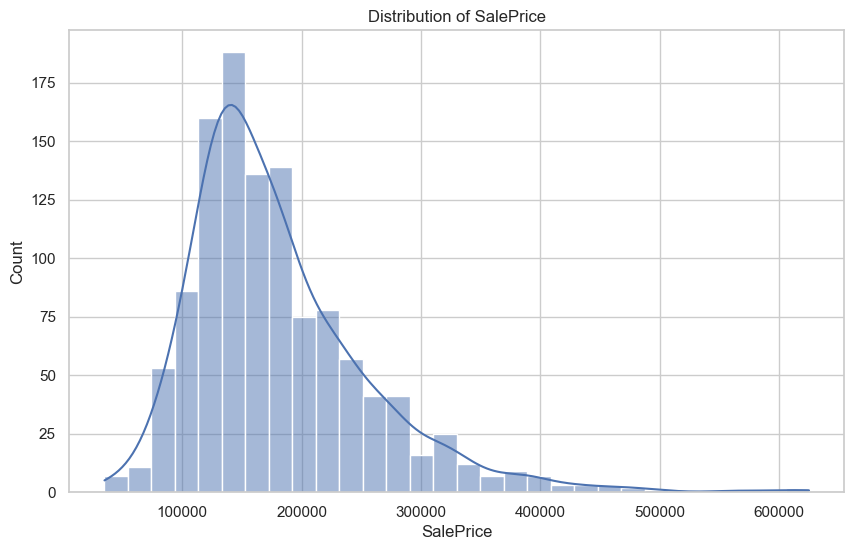

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

In [42]:
# Correlation matrix for numerical variables
correlation_matrix = train_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Display top 10 features most correlated with SalePrice
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr_features)


ValueError: could not convert string to float: 'Pave'

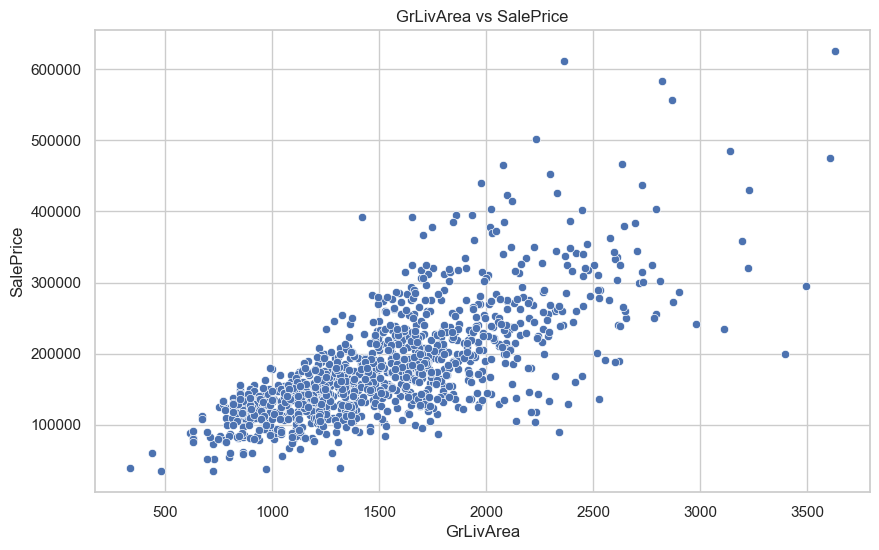

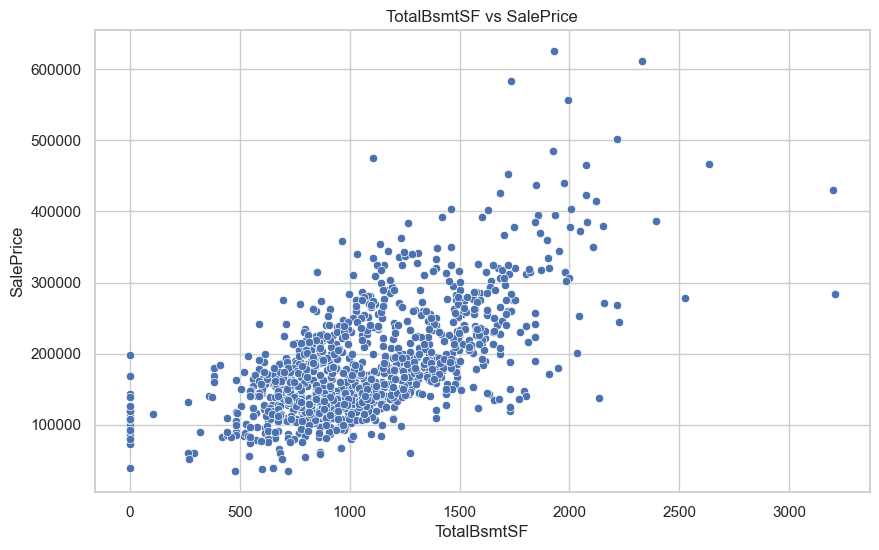

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs SalePrice')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df)
plt.title('TotalBsmtSF vs SalePrice')
plt.show()

In [48]:
# Bar plot for MSZoning vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=train_df)
plt.title('MSZoning vs SalePrice')
plt.show()

# Bar plot for Neighborhood vs SalePrice
plt.figure(figsize=(15, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()


ValueError: Could not interpret input 'MSZoning'

<Figure size 1000x600 with 0 Axes>

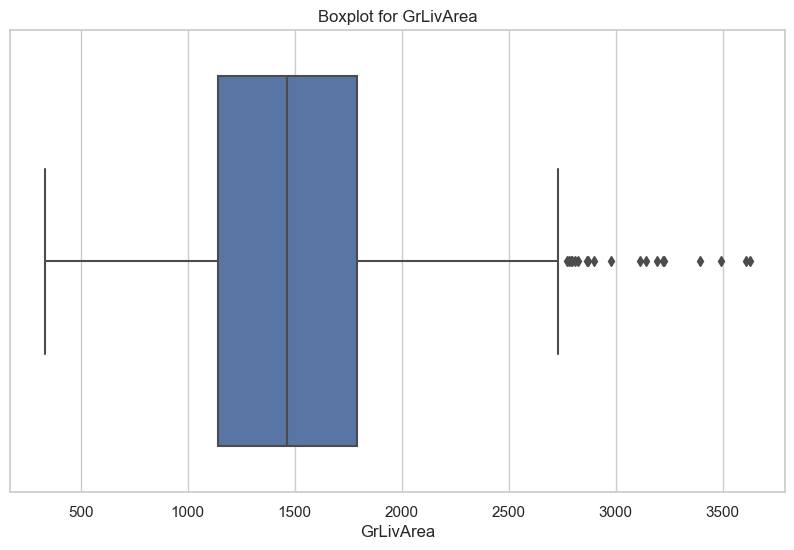

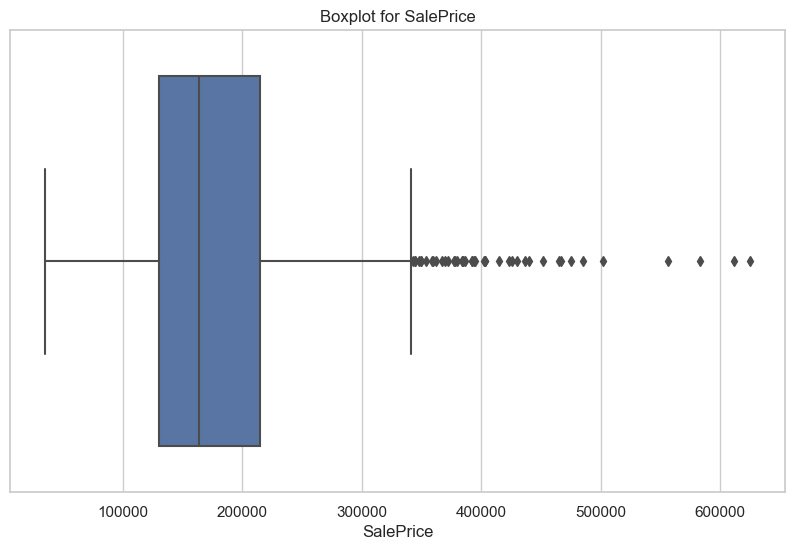

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['GrLivArea'])
plt.title('Boxplot for GrLivArea')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['SalePrice'])
plt.title('Boxplot for SalePrice')
plt.show()

MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1159
Fence            928
MiscFeature     1120
dtype: int64


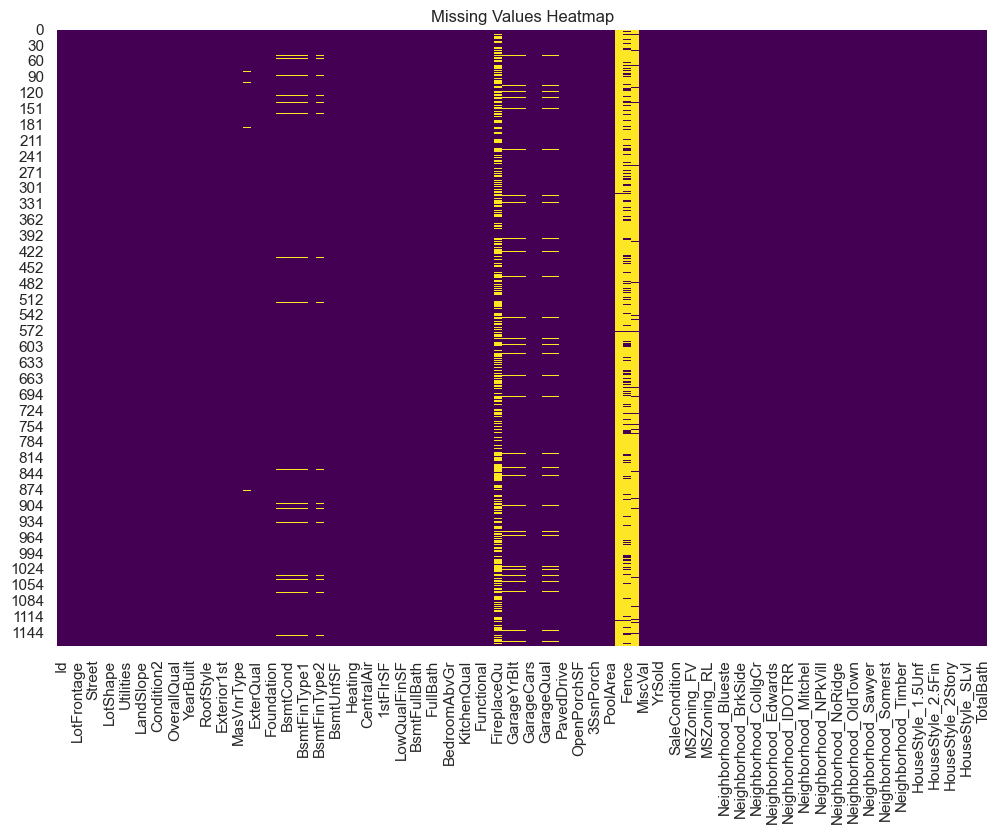

In [51]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

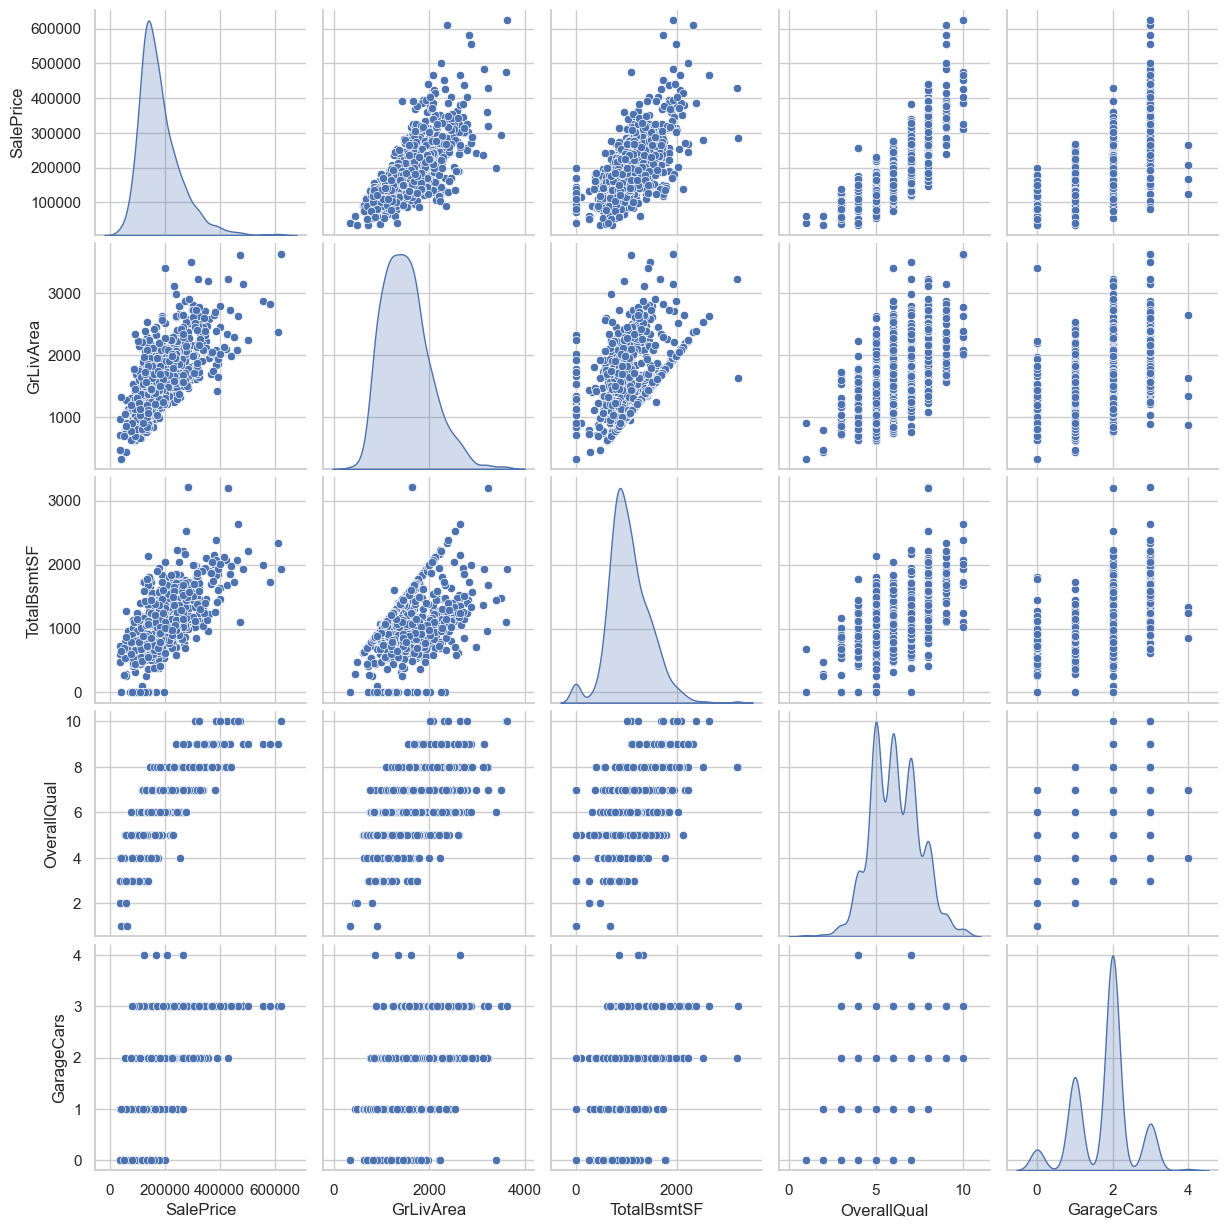

In [54]:
selected_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars']
sns.pairplot(train_df[selected_features], diag_kind='kde')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


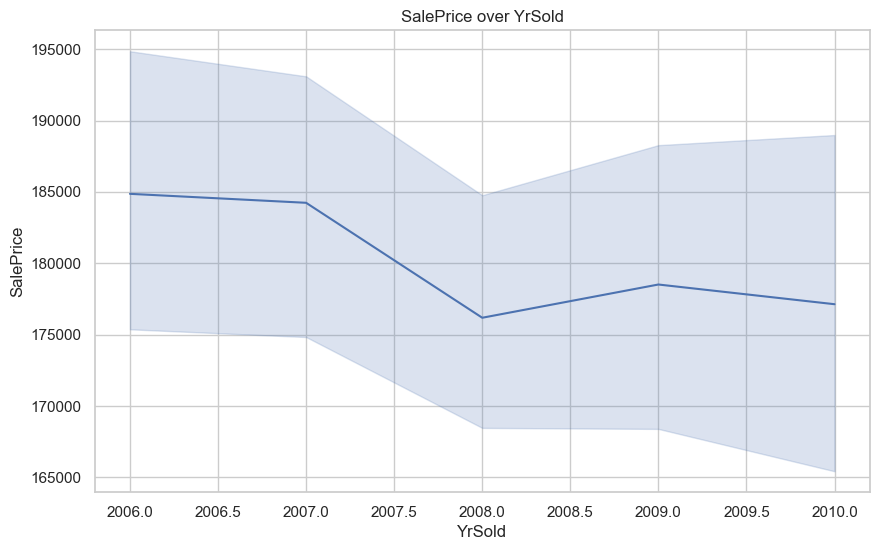

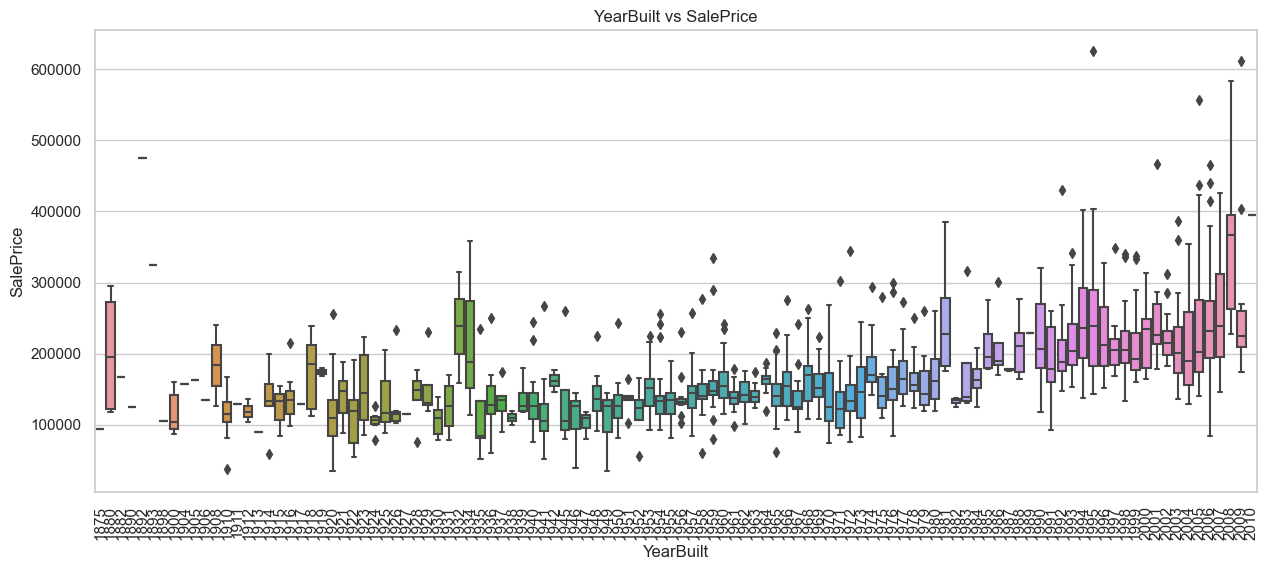

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=train_df)
plt.title('SalePrice over YrSold')
plt.show()
plt.figure(figsize=(15, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title('YearBuilt vs SalePrice')
plt.show()

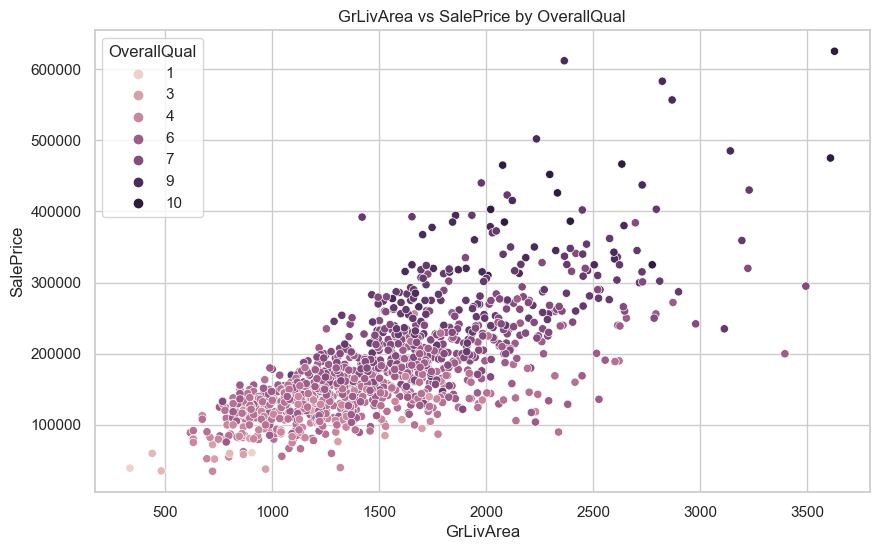

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=train_df)
plt.title('GrLivArea vs SalePrice by OverallQual')
plt.show()

In [57]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
print(train_df[['YearBuilt', 'YrSold', 'HouseAge']].head())

   YearBuilt  YrSold  HouseAge
0       1976    2007        31
1       1970    2007        37
2       1996    2007        11
3       1977    2010        33
4       1977    2009        32


In [58]:
train_df['RemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
print(train_df[['YearRemodAdd', 'YrSold', 'RemodelAge']].head())

   YearRemodAdd  YrSold  RemodelAge
0          1976    2007          31
1          1970    2007          37
2          1997    2007          10
3          1977    2010          33
4          2000    2009           9


In [63]:
train_df['TotalBath'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
print(train_df[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']].head())

   FullBath  HalfBath  BsmtFullBath  BsmtHalfBath  TotalBath
0         2         0             0             0        2.0
1         2         0             1             0        3.0
2         2         1             1             0        3.5
3         2         0             0             0        2.0
4         2         0             0             1        2.5


In [60]:
train_df['TotalPorchSF'] = (train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + 
                            train_df['3SsnPorch'] + train_df['ScreenPorch'])
print(train_df[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalPorchSF']].head())

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  TotalPorchSF
0          205              0          0            0           205
1          207              0          0          224           431
2          130              0          0            0           130
3          122              0          0            0           122
4            0              0          0            0             0


In [64]:
train_df['HasBsmt'] = train_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
print(train_df[['HasBsmt', 'HasGarage', 'HasPool', 'HasFireplace']].head())

   HasBsmt  HasGarage  HasPool  HasFireplace
0        1          1        0             1
1        1          1        0             1
2        1          1        0             1
3        1          1        0             1
4        1          1        0             1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


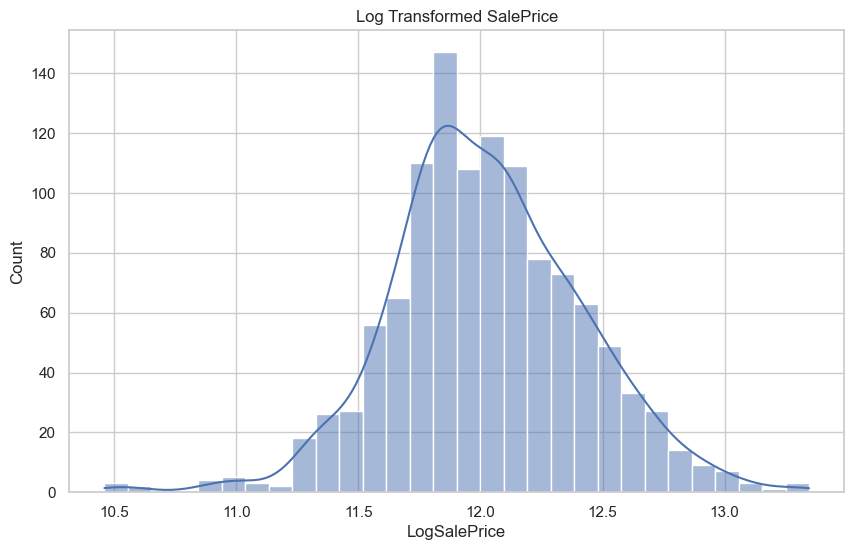

In [62]:
import numpy as np
train_df['LogSalePrice'] = np.log1p(train_df['SalePrice']) 
plt.figure(figsize=(10, 6))
sns.histplot(train_df['LogSalePrice'], kde=True, bins=30)
plt.title('Log Transformed SalePrice')
plt.show()

In [66]:
train_df['YearBuiltBin'] = pd.cut(train_df['YearBuilt'], bins=[1870, 1945, 1980, 2000, 2020], 
                                  labels=['Old', 'Mid_Age', 'Recent', 'New'])
print(train_df[['YearBuilt', 'YearBuiltBin']].head())

   YearBuilt YearBuiltBin
0       1976      Mid_Age
1       1970      Mid_Age
2       1996       Recent
3       1977      Mid_Age
4       1977      Mid_Age


In [67]:
train_df = pd.get_dummies(train_df, columns=['MSZoning', 'Neighborhood', 'HouseStyle'], drop_first=True)
print(train_df.head())

KeyError: "None of [Index(['MSZoning', 'Neighborhood', 'HouseStyle'], dtype='object')] are in the [columns]"

In [68]:
train_df['GrLivArea_OverallQual'] = train_df['GrLivArea'] * train_df['OverallQual']
print(train_df[['GrLivArea', 'OverallQual', 'GrLivArea_OverallQual']].head())

   GrLivArea  OverallQual  GrLivArea_OverallQual
0        958            6                   5748
1       2217            8                  17736
2       2013            7                  14091
3       1844            6                  11064
4       1602            6                   9612


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'HouseAge', 'TotalBath']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
print(train_df[numerical_features].head())

   GrLivArea  TotalBsmtSF  GarageArea  HouseAge  TotalBath
0  -1.129635     0.062013   -0.165497 -0.198182  -0.261048
1   1.428804     2.847047    0.687720  0.000655   1.026493
2   1.014251     0.157374   -0.094788 -0.860971   1.670264
3   0.670823     1.935004    0.334177 -0.131903  -0.261048
4   0.179050     1.343276    0.254041 -0.165042   0.382723


In [70]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['SalePrice', 'LogSalePrice'], axis=1) 
y = train_df['SalePrice'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(931, 122) (233, 122)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f'Linear Regression - Training RMSE: {train_rmse}, R²: {train_r2}')
print(f'Linear Regression - Test RMSE: {test_rmse}, R²: {test_r2}')

ValueError: could not convert string to float: 'Pave'

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge regression with GridSearchCV for hyperparameter tuning
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

# Best parameters
print(f'Best alpha for Ridge: {ridge_grid.best_params_}')

# Predictions and evaluation
y_pred_ridge = ridge_grid.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Test RMSE: {ridge_rmse}, R²: {ridge_r2}')


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py", line 1126, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Pave'


In [73]:
from sklearn.linear_model import Lasso

# Lasso regression with GridSearchCV for hyperparameter tuning
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

# Best parameters
print(f'Best alpha for Lasso: {lasso_grid.best_params_}')

# Predictions and evaluation
y_pred_lasso = lasso_grid.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - Test RMSE: {lasso_rmse}, R²: {lasso_r2}')


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py", line 908, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Pave'


In [74]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Test RMSE: {rf_rmse}, R²: {rf_r2}')


ValueError: could not convert string to float: 'Pave'

In [75]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb.predict(X_test)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - Test RMSE: {xgb_rmse}, R²: {xgb_r2}')


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Street: object, Alley: object, LotShape: object, LandContour: object, Utilities: object, LotConfig: object, LandSlope: object, Condition1: object, Condition2: object, BldgType: object, RoofStyle: object, RoofMatl: object, Exterior1st: object, Exterior2nd: object, MasVnrType: object, ExterQual: object, ExterCond: object, Foundation: object, BsmtQual: object, BsmtCond: object, BsmtExposure: object, BsmtFinType1: object, BsmtFinType2: object, Heating: object, HeatingQC: object, CentralAir: object, Electrical: object, KitchenQual: object, Functional: object, FireplaceQu: object, GarageType: object, GarageFinish: object, GarageQual: object, GarageCond: object, PavedDrive: object, PoolQC: object, Fence: object, MiscFeature: object, SaleType: object, SaleCondition: object, YearBuiltBin: category

In [76]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}

xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

# Best parameters
print(f'Best params for XGBoost: {xgb_grid.best_params_}')

# Predictions and evaluation
y_pred_xgb_best = xgb_grid.predict(X_test)
xgb_best_rmse = mean_squared_error(y_test, y_pred_xgb_best, squared=False)
xgb_best_r2 = r2_score(y_test, y_pred_xgb_best)

print(f'XGBoost (Tuned) - Test RMSE: {xgb_best_rmse}, R²: {xgb_best_r2}')


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1081, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 1573, in __init__
    self._init(
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 1632, in _init
    it.reraise()
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
           ^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 1416, in next
    input_data(**self.kwargs)
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 1459, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "/opt/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Street: object, Alley: object, LotShape: object, LandContour: object, Utilities: object, LotConfig: object, LandSlope: object, Condition1: object, Condition2: object, BldgType: object, RoofStyle: object, RoofMatl: object, Exterior1st: object, Exterior2nd: object, MasVnrType: object, ExterQual: object, ExterCond: object, Foundation: object, BsmtQual: object, BsmtCond: object, BsmtExposure: object, BsmtFinType1: object, BsmtFinType2: object, Heating: object, HeatingQC: object, CentralAir: object, Electrical: object, KitchenQual: object, Functional: object, FireplaceQu: object, GarageType: object, GarageFinish: object, GarageQual: object, GarageCond: object, PavedDrive: object, PoolQC: object, Fence: object, MiscFeature: object, SaleType: object, SaleCondition: object, YearBuiltBin: category


In [77]:
models = {
    'Linear Regression': (test_rmse, test_r2),
    'Ridge Regression': (ridge_rmse, ridge_r2),
    'Lasso Regression': (lasso_rmse, lasso_r2),
    'Random Forest': (rf_rmse, rf_r2),
    'XGBoost': (xgb_rmse, xgb_r2),
    'XGBoost (Tuned)': (xgb_best_rmse, xgb_best_r2)
}

for model_name, (rmse, r2) in models.items():
    print(f'{model_name} - RMSE: {rmse}, R²: {r2}')


NameError: name 'ridge_rmse' is not defined

In [ ]:
pip install scikit-learn xgboost


In [78]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data (adjust path to your dataset if needed)
train_df = pd.read_csv('/mnt/data/train.csv')

# Define features and target variable (ensure no NaN in the target)
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dimensions
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/train.csv'

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset (adjust the file paths if necessary)
train_df = pd.read_csv('/mnt/data/train.csv')

# Check for missing values
print(train_df.isnull().sum())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/train.csv'

In [15]:
pip install scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset (adjust the file paths if necessary)
train_df = pd.read_csv('/mnt/data/train.csv')

# Check for missing values
print(train_df.isnull().sum())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/train.csv'

In [81]:
# Fill missing numerical values with the median
train_df.fillna(train_df.median(), inplace=True)

# For simplicity, we will drop columns with missing categorical data for now
train_df.dropna(axis=1, inplace=True)

# Check if there are any remaining missing values
print(train_df.isnull().sum().sum())  # Should return 0 if all missing values are handled


TypeError: could not convert string to float: 'Pave'

In [84]:
# Define the features (X) and target (y)
X = train_df.drop(columns=['SalePrice'])  # Drop the target column
y = train_df['SalePrice']  # Target variable

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [85]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data to ensure it's correct
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (931, 255), Testing data shape: (233, 255)


In [20]:
# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_test_pred = linear_reg.predict(X_test)

# Evaluate the Linear Regression model
linear_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
linear_r2 = r2_score(y_test, y_test_pred)

print(f'Linear Regression - RMSE: {linear_rmse}, R²: {linear_r2}')


Linear Regression - RMSE: 16700.69323054625, R²: 0.8869425973903134


In [21]:
# Initialize and train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_test_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest Regressor model
rf_rmse = mean_squared_error(y_test, y_test_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest - RMSE: {rf_rmse}, R²: {rf_r2}')


Random Forest - RMSE: 16903.228182635583, R²: 0.8841837990991896


In [22]:
# Initialize and train the XGBoost Regressor model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_test_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost Regressor model
xgb_rmse = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_test_pred_xgb)

print(f'XGBoost - RMSE: {xgb_rmse}, R²: {xgb_r2}')


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [86]:
models = {
    'Linear Regression': (linear_rmse, linear_r2),
    'Random Forest': (rf_rmse, rf_r2),
}

for model_name, (rmse, r2) in models.items():
    print(f'{model_name} - RMSE: {rmse}, R²: {r2}')


Linear Regression - RMSE: 16700.69323054625, R²: 0.8869425973903134
Random Forest - RMSE: 16903.228182635583, R²: 0.8841837990991896


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on training and test sets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate RMSE and R² for both training and test sets
linear_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
linear_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

linear_train_r2 = r2_score(y_train, y_train_pred)
linear_test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f'Linear Regression - Training RMSE: {linear_train_rmse}, Test RMSE: {linear_test_rmse}')
print(f'Linear Regression - Training R²: {linear_train_r2}, Test R²: {linear_test_r2}')


Linear Regression - Training RMSE: 7304.870356926568, Test RMSE: 16700.69323054625
Linear Regression - Training R²: 0.9701536763242796, Test R²: 0.8869425973903134


In [25]:
# Predictions on training and test sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate RMSE and R² for Random Forest
rf_train_rmse = mean_squared_error(y_train, y_train_pred_rf, squared=False)
rf_test_rmse = mean_squared_error(y_test, y_test_pred_rf, squared=False)

rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

# Print results
print(f'Random Forest - Training RMSE: {rf_train_rmse}, Test RMSE: {rf_test_rmse}')
print(f'Random Forest - Training R²: {rf_train_r2}, Test R²: {rf_test_r2}')


Random Forest - Training RMSE: 5274.24725699689, Test RMSE: 16903.228182635583
Random Forest - Training R²: 0.9844408169411334, Test R²: 0.8841837990991896


In [26]:
# Predictions on training and test sets
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

# Calculate RMSE and R² for XGBoost
xgb_train_rmse = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
xgb_test_rmse = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

xgb_train_r2 = r2_score(y_train, y_train_pred_xgb)
xgb_test_r2 = r2_score(y_test, y_test_pred_xgb)

# Print results
print(f'XGBoost - Training RMSE: {xgb_train_rmse}, Test RMSE: {xgb_test_rmse}')
print(f'XGBoost - Training R²: {xgb_train_r2}, Test R²: {xgb_test_r2}')


NotFittedError: need to call fit or load_model beforehand

In [28]:
# Storing results for each model
models_results = {
    'Linear Regression': (linear_train_rmse, linear_test_rmse, linear_train_r2, linear_test_r2),
    'Random Forest': (rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2),
    
}

# Print the comparison results for RMSE and R² for each model
for model_name, (train_rmse, test_rmse, train_r2, test_r2) in models_results.items():
    print(f'{model_name}:')
    print(f'  Training RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')
    print(f'  Training R²: {train_r2:.2f}, Test R²: {test_r2:.2f}')


Linear Regression:
  Training RMSE: 7304.87, Test RMSE: 16700.69
  Training R²: 0.97, Test R²: 0.89
Random Forest:
  Training RMSE: 5274.25, Test RMSE: 16903.23
  Training R²: 0.98, Test R²: 0.88


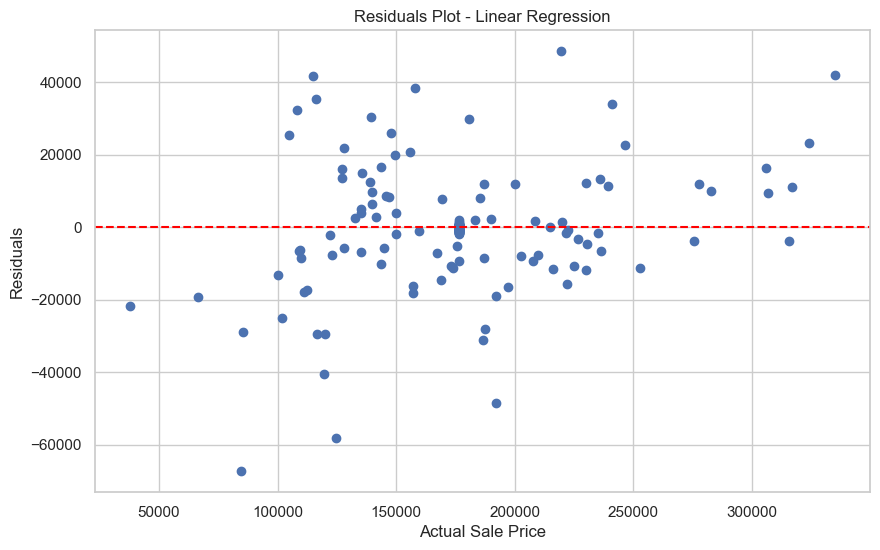

In [29]:
import matplotlib.pyplot as plt

# Residuals for Linear Regression
residuals = y_test - y_test_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Linear Regression')
plt.show()


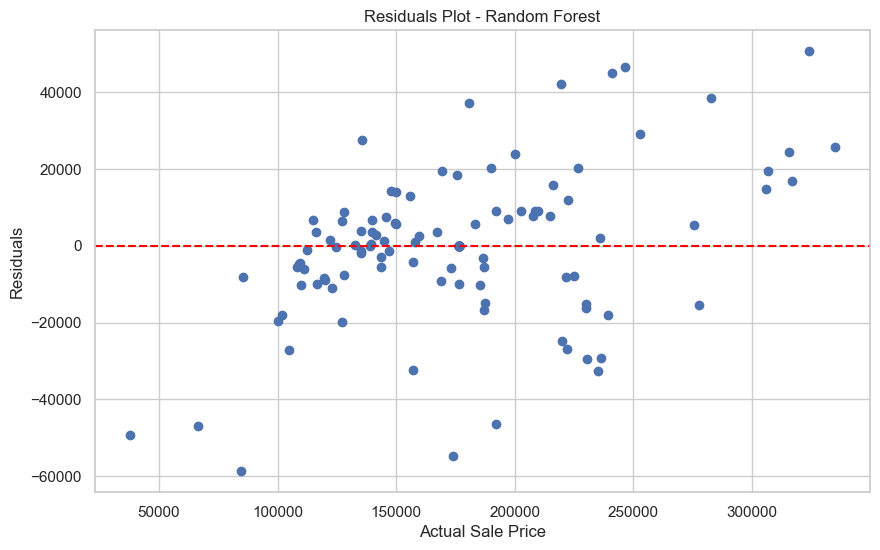

In [30]:
# Residuals for Random Forest
residuals_rf = y_test - y_test_pred_rf

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Random Forest')
plt.show()